Jonathon Nguyen

ID: 801093003

Homework 1

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from torchvision import datasets
from torchvision import transforms
import time

In [4]:
def normalized_data(tensor):
    mean = torch.mean(tensor)
    std = torch.std(tensor)
    new_tensor = (tensor - mean) / std
    
    return new_tensor

def training_loop(epochs, optimizer, model, loss_fn, training_vars, validation_vars, 
                  training_prices, validation_prices):
    for epoch in range(1, epochs + 1):
        prices_p_train = torch.squeeze(model(training_vars))
        loss_train = loss_fn(prices_p_train, training_prices)
        
        prices_p_val = torch.squeeze(model(validation_vars))
        loss_val = loss_fn(prices_p_val, validation_prices)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        print(f'Epoch {epoch}: Training Loss: {float(loss_train)}, Validation Loss: {float(loss_val)}')

In [5]:
NUM_EPOCHS = 200

# Read the data from the provided CSV files
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

# Split the data into the input vars and the prices.
names_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
prices = housing['price']

# Find the length of the column.
num_samples = len(prices)
num_val = int(0.2 * num_samples)

# Generate the random indices with 80% training and 20% Validation
random_indices = torch.randperm(num_samples)
training_indices = random_indices[:-num_val]
validation_indices = random_indices[-num_val:]

input_vars = torch.tensor(housing[names_vars].values).float()
training_tensor = normalized_data(input_vars[training_indices])
validation_tensor = normalized_data(input_vars[validation_indices])

# Convert the prices to a tensor.
prices = torch.tensor(prices.values).float()
price_training = prices[training_indices]
price_validation = prices[validation_indices]

In [6]:
model = nn.Sequential(
        nn.Linear(5, 8),
        nn.Tanh(),
        nn.Linear(8, 1))

optimizer = optim.Adam(model.parameters(), lr=.0001)

In [7]:
training_loop(NUM_EPOCHS, optimizer, model, nn.MSELoss(), training_tensor, validation_tensor, price_training, price_validation)

Epoch 1: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 2: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 3: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 4: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 5: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 6: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 7: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 8: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 9: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 10: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 11: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 12: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 13: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 14

Epoch 175: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 176: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 177: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 178: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 179: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 180: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 181: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 182: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 183: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 184: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 185: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 186: Training Loss: 25784615960576.0, Validation Loss: 27930690322432.0
Epoch 187: Training Loss: 25784615960576.0, Validation Loss: 279

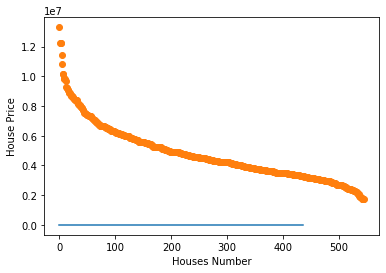

In [8]:
# Find the predicted prices
prices_p = model(training_tensor)

fig = plt.figure()
# Name the x and y axis
plt.xlabel("Houses Number")
plt.ylabel("House Price")

# Plot the model and the actual values.
plt.plot(prices_p.detach().numpy())
plt.plot(prices.numpy(), 'o')

Problem 2

In [92]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
])

def training_loop(epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, epochs + 1):
        for imgs, labels in train_loader:
            output = model(imgs.view(imgs.shape[0], -1))
            loss = loss_fn(output, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        print(f"Epoch: {epoch}, Loss: {float(loss)}")
        
    return float(loss)
        
def model_accuracy(model, val_loader):
    correct_labels = 0
    count = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            output = model(imgs.view(imgs.shape[0], -1))
            _, predicted = torch.max(output, dim=1)
            count += labels.shape[0]
            correct_labels += int((predicted == labels).sum())
            
    return (correct_labels/count)

In [93]:
data = '.\cifar10'
cirfar10_train = datasets.CIFAR10(data, train=True, download=True, transform=transforms)
cirfar10_val = datasets.CIFAR10(data, train=False, download=True, transform=transforms)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Files already downloaded and verified
Files already downloaded and verified


In [94]:
NUM_EPOCHS = 200
LEARNING_RATE = 1e-2
BATCH_SIZE = 64

model = nn.Sequential(
        nn.Linear(3072, 512),
        nn.Tanh(),
        nn.Linear(512, 10),
        nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
train_loader = torch.utils.data.DataLoader(cirfar10_train, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(cirfar10_val, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
start_time = time.time()
model_loss = training_loop(NUM_EPOCHS, optimizer, model, loss, train_loader)
end_time = time.time()

accuracy = model_accuracy(model, val_loader)
print(f"Final Loss: {model_loss}, Accuracy: {accuracy}, Training Time: {end_time - start_time}")

Epoch: 1, Loss: 1.938023328781128
Epoch: 2, Loss: 1.5543781518936157
Epoch: 3, Loss: 1.713837742805481
Epoch: 4, Loss: 1.4329555034637451
Epoch: 5, Loss: 1.704573154449463
Epoch: 6, Loss: 1.647623062133789
Epoch: 7, Loss: 1.3034782409667969
Epoch: 8, Loss: 1.050805687904358
Epoch: 9, Loss: 1.5079537630081177
Epoch: 10, Loss: 1.531625509262085
Epoch: 11, Loss: 1.329476237297058
Epoch: 12, Loss: 1.082698106765747
Epoch: 13, Loss: 1.4781088829040527
Epoch: 14, Loss: 1.3487108945846558
Epoch: 15, Loss: 0.9100440144538879
Epoch: 16, Loss: 1.4549726247787476
Epoch: 17, Loss: 1.1704161167144775
Epoch: 18, Loss: 0.6116312742233276
Epoch: 19, Loss: 1.2248152494430542
Epoch: 20, Loss: 0.8762352466583252
Epoch: 21, Loss: 0.9975309371948242
Epoch: 22, Loss: 0.9642748832702637
Epoch: 23, Loss: 1.3133028745651245
Epoch: 24, Loss: 0.8183352947235107
Epoch: 25, Loss: 0.8058861494064331
Epoch: 26, Loss: 0.6385502219200134
Epoch: 27, Loss: 1.0373423099517822
Epoch: 28, Loss: 0.8627930283546448
Epoch: 29

In [ ]:
model_new = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.Tanh(),
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1))

start_time = time.time()
model_loss = training_loop(NUM_EPOCHS, optimizer, model_new, loss, train_loader)
end_time = time.time()

accuracy = model_accuracy(model, val_loader)
print(f"Final Loss: {model_loss}, Accuracy: {accuracy}, Training Time: {end_time - start_time}")